### Data Analysis using SQL + Python

In [169]:
import kaggle
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Download the dataset from Kaggle
#!kaggle datasets download ankitbansal06/retail-orders -f orders.csv


# # Rename file from .csv to .zip
# os.rename("orders.csv", "orders.zip")


# #extract file from zip file
# import zipfile
# zip_ref = zipfile.ZipFile('orders.zip') 
# zip_ref.extractall() # extract file to dir
# zip_ref.close() # close file


#read data from the file and handle null values
import pandas as pd
df = pd.read_csv("orders.csv")
df.columns

Index(['Order Id', 'Order Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub Category',
       'Product Id', 'cost price', 'List Price', 'Quantity',
       'Discount Percent'],
      dtype='object')

In [170]:
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [171]:
df.dtypes

Order Id             int64
Order Date          object
Ship Mode           object
Segment             object
Country             object
City                object
State               object
Postal Code          int64
Region              object
Category            object
Sub Category        object
Product Id          object
cost price           int64
List Price           int64
Quantity             int64
Discount Percent     int64
dtype: object

In [172]:
#convert order date from object data type to datetime
df['Order Date']=pd.to_datetime(df['Order Date'],format="%Y-%m-%d")

In [173]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [174]:
df = pd.read_csv('orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [175]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.lower()

In [176]:
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [177]:
#derive new columns discount , sale price and profit
df['discount'] = df['list_price']*df['discount_percent']*.01
df['sale_price'] = df['list_price'] - df['discount']
df['profit'] = df['sale_price'] - df['cost_price']
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [178]:
#dropping cost price list price and discount percent columns
df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)


In [179]:
from sqlalchemy import create_engine

# Replace with your actual PostgreSQL credentials
username = 'postgres'            # 'postgres'
password = 'rsmsql01'            # your DB password
host = 'localhost'               # or IP address
port = '5432'                    # default PostgreSQL port
database = 'projects'            # your database name 

# Create the SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

In [180]:
#df.to_sql('df_orders', engine, index=False, if_exists='append', schema='etl')

In [181]:
import psycopg2 as psy

conn = psy.connect(user = 'postgres',      # 'postgres'
password = 'rsmsql01',                         # your DB password
host = 'localhost',                            # or IP address
port = '5432',                                 # default PostgreSQL port
database = 'projects')                        # your database name 

In [182]:
query = """select * from etl.df_orders"""

In [183]:
df = pd.read_sql_query(query, conn)
df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\51381808.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [184]:
# find top 10 highest reveue generating products 

q1 = """select product_id, sum(quantity*sale_price) as revenue_generated
from etl.df_orders 
group by product_id 
order by revenue_generated desc 
limit 10"""
top_10_revenue_generating_products = pd.read_sql_query(q1, conn)
top_10_revenue_generating_products

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\3653604689.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_10_revenue_generating_products = pd.read_sql_query(q1, conn)


,product_id,revenue_generated
0,TEC-CO-10004722,245056.0
1,OFF-BI-10000545,163777.7
2,TEC-MA-10002412,130406.4
3,FUR-CH-10002024,120090.7
4,TEC-PH-10001459,113041.9
5,TEC-CO-10001449,107388.0
6,OFF-BI-10003527,97082.9
7,TEC-MA-10000822,89622.3
8,FUR-BO-10002213,84014.8
9,TEC-MA-10001047,81549.0


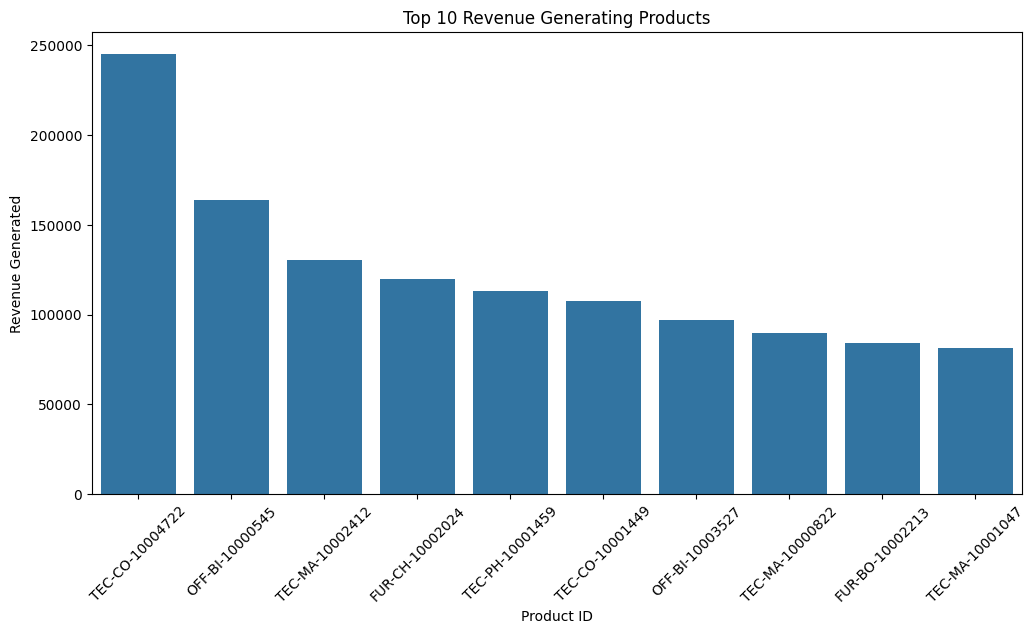

In [205]:
plt.figure(figsize=(12, 6))
sns.barplot(data = top_10_revenue_generating_products, x = 'product_id', y = 'revenue_generated')
plt.title('Top 10 Revenue Generating Products')
plt.xlabel('Product ID')
plt.ylabel('Revenue Generated')
plt.xticks(rotation=45)
plt.show()

In [185]:
# find top 5 highest selling products in each region

q2 = """with t1 as(select region, product_id, sum(quantity*sale_price) as revenue_generated
from etl.df_orders 
group by region, product_id)
select *
from (select *, row_number() over(partition by region order by revenue_generated desc) as row_num
from t1) as s1
where row_num <= 5
"""
top_5_selling_products = pd.read_sql_query(q2, conn)
top_5_selling_products

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\1188187317.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_5_selling_products = pd.read_sql_query(q2, conn)


,region,product_id,revenue_generated,row_num
0,Central,OFF-BI-10000545,125827.5,1
1,Central,TEC-CO-10004722,84875.0,2
2,Central,TEC-MA-10000822,77509.8,3
3,Central,OFF-BI-10001120,55282.5,4
4,Central,OFF-BI-10004995,42210.0,5
5,East,TEC-CO-10004722,106421.0,1
6,East,TEC-MA-10001047,81549.0,2
7,East,FUR-BO-10004834,66364.2,3
8,East,TEC-CO-10001449,60948.0,4
9,East,FUR-CH-10002024,60189.6,5


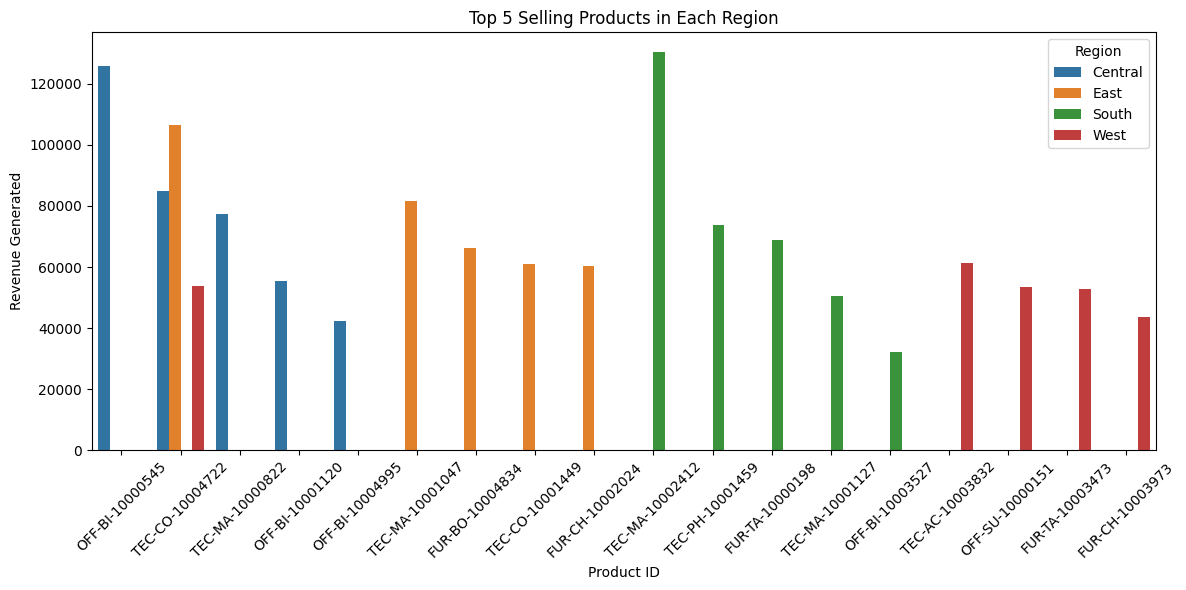

In [204]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_5_selling_products, x='product_id', y='revenue_generated', hue='region')
plt.title('Top 5 Selling Products in Each Region')
plt.xlabel('Product ID')
plt.ylabel('Revenue Generated')
plt.legend(title='Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [186]:
# find month over month growth comparison for 2022 and 2023 sales eg : jan 2022 vs jan 2023

q3 =  """
with t1 as(select extract(year from order_date) as year, to_char(order_date, 'Month') as month, extract(month from order_date) as month_num, sum(quantity*sale_price) as sales
from etl.df_orders
group by year,month_num, month
order by year,month_num, month)
select month, sum(sales_2022) as sales_2022, sum(sales_2023) as sales_2023
from(select month, month_num,
case when year = 2022 then sales else 0 end as sales_2022,
case when year = 2023 then sales else 0 end as sales_2023
from t1) s1
group by month, month_num
order by month_num
"""

month_over_month_growth = pd.read_sql_query(q3, conn)
month_over_month_growth

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\2543314249.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  month_over_month_growth = pd.read_sql_query(q3, conn)


,month,sales_2022,sales_2023
0,January,437431.3,434765.5
1,February,444011.1,731638.8
2,March,394105.2,393051.9
3,April,476400.9,543231.5
4,May,413625.5,410707.9
5,June,465300.3,328939.0
6,July,375278.4,422533.7
7,August,534562.4,465010.3
8,September,433887.0,420620.5
9,October,601707.8,626498.3


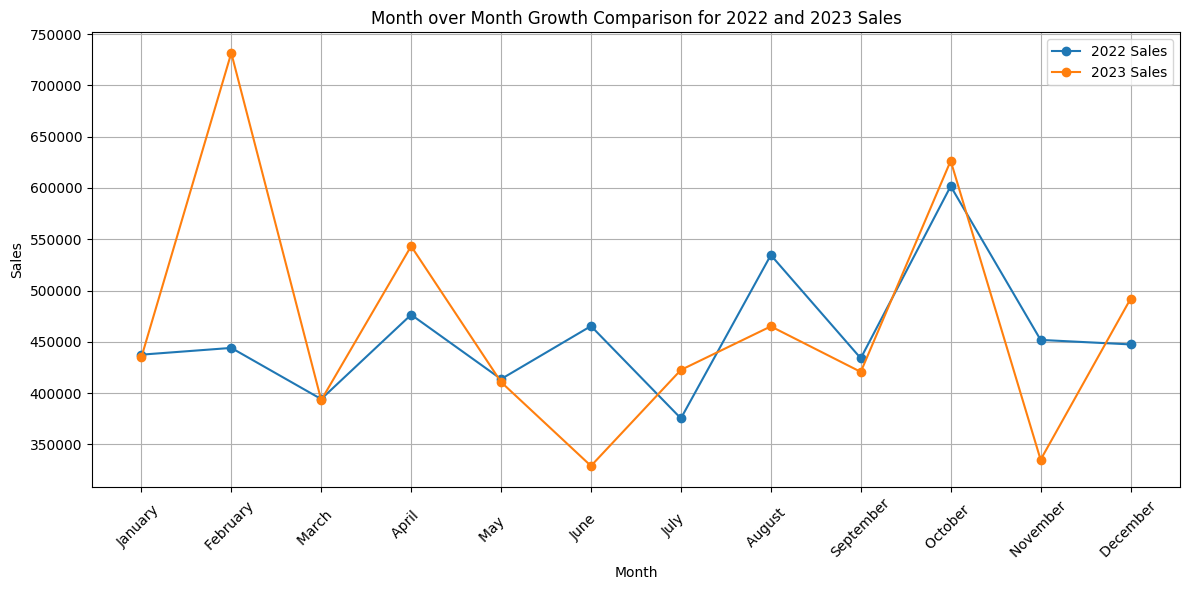

In [199]:
plt.figure(figsize=(12, 6))
plt.title('Month over Month Growth Comparison for 2022 and 2023 Sales')
plt.plot(month_over_month_growth['month'], month_over_month_growth['sales_2022'], marker='o', label='2022 Sales')
plt.plot(month_over_month_growth['month'], month_over_month_growth['sales_2023'], marker='o', label='2023 Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# for each category which month had highest sales 

q4 = """
with t1 as (select category, to_char(order_date, 'yyyy') as year, to_char(order_date, 'Month') as month, sum(quantity*sale_price) as sales
from etl.df_orders
group by category, year, Month)
select category, year, month, sales 
from(select category, year, month, sales, 
row_number() over(partition by category, year order by sales desc) as rn
from t1) s1
where rn = 1

"""


highest_sales_per_category = pd.read_sql_query(q4, conn)
highest_sales_per_category.head(60)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\1962974907.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  highest_sales_per_category = pd.read_sql_query(q4, conn)


,category,year,month,sales
0,Furniture,2022,October,229024.8
1,Furniture,2023,August,230523.5
2,Office Supplies,2022,April,198846.3
3,Office Supplies,2023,February,287244.6
4,Technology,2022,October,250400.7
5,Technology,2023,October,295586.5


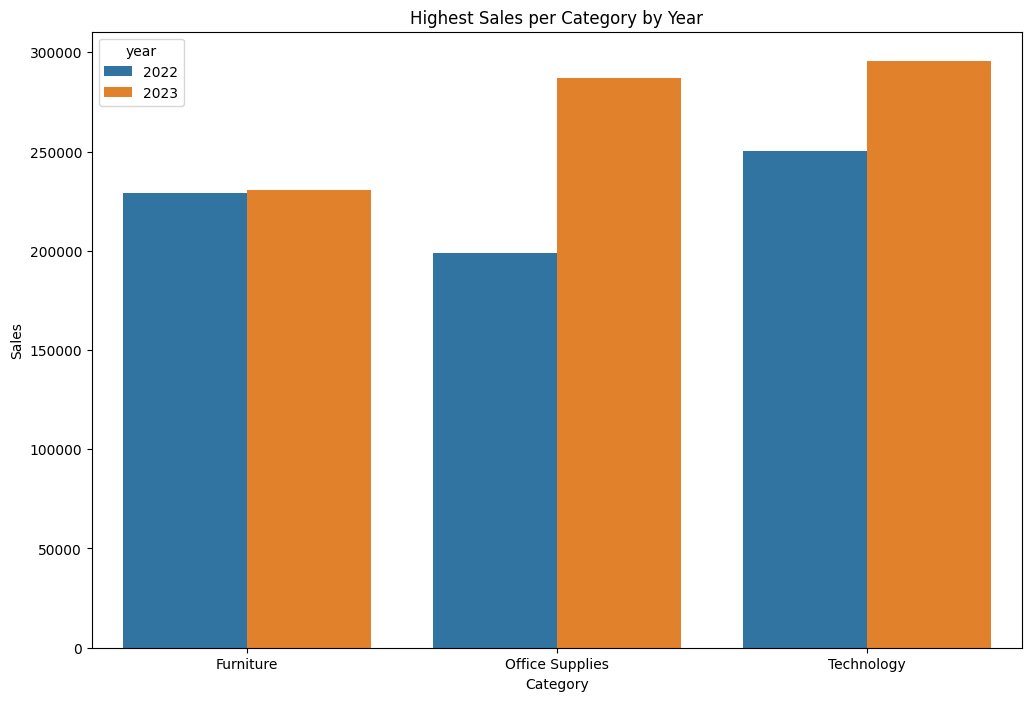

In [194]:
plt.figure(figsize=(12, 8))
sns.barplot(data=highest_sales_per_category, x = "category", y="sales", hue="year")
plt.title("Highest Sales per Category by Year")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [190]:
# which sub category had highest growth by profit in 2023 compare to 2022

q5 = """
with t1 as(select sub_category, to_char(order_date, 'yyyy') as year, sum(profit*quantity) as profit
from etl.df_orders
group by sub_category, year)
select sub_category, year, profit
from (select sub_category, year, profit,
row_number() over(partition by sub_category order by profit desc) as rn
from t1) s1
where rn = 1 and cast(year as int) = 2023 
order by profit desc
"""  

highest_growth_sub_category = pd.read_sql_query(q5, conn)
highest_growth_sub_category.head(60)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17168\969516208.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  highest_growth_sub_category = pd.read_sql_query(q5, conn)


,sub_category,year,profit
0,Phones,2023,76438.2
1,Binders,2023,57990.3
2,Machines,2023,56939.8
3,Storage,2023,53177.5
4,Accessories,2023,40613.7
5,Bookcases,2023,25776.1
6,Paper,2023,16211.9
7,Supplies,2023,9241.5
8,Envelopes,2023,3502.4
9,Labels,2023,2181.6


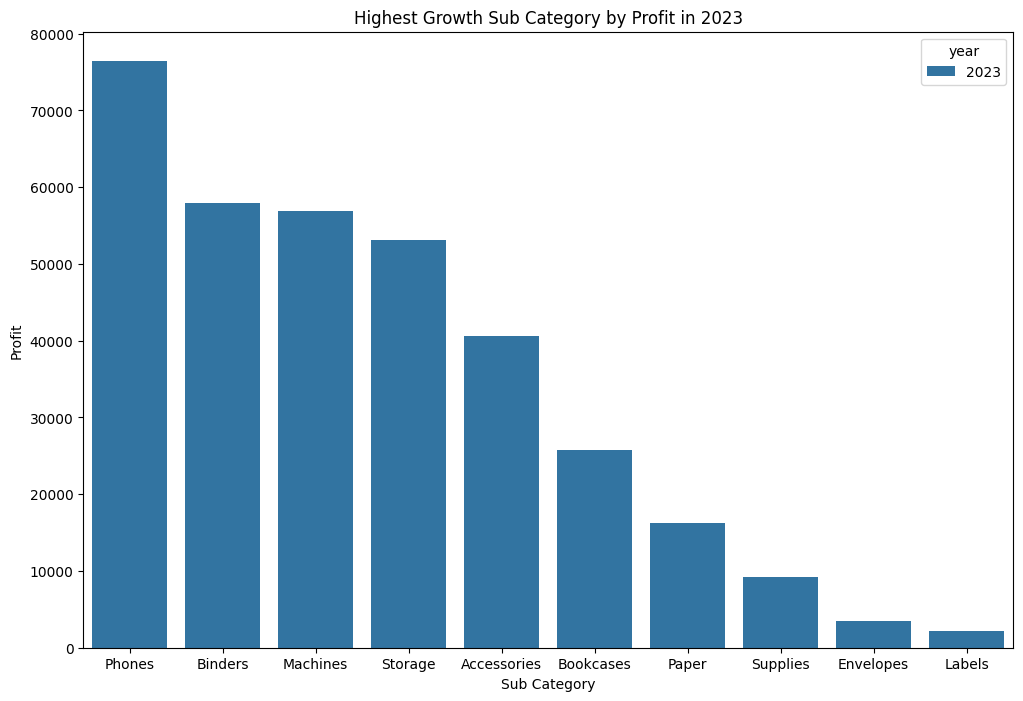

In [198]:
plt.figure(figsize=(12, 8))
sns.barplot(data=highest_growth_sub_category, x = "sub_category", y="profit", hue="year")
plt.title("Highest Growth Sub Category by Profit in 2023")
plt.xlabel("Sub Category")
plt.ylabel("Profit")
plt.show()